# **LOAN DEFAULT PREDICTION**

**Dataset Source**: *https://www.kaggle.com/datasets/wordsforthewise/lending-club* <br>
**Platform**: Google Colab
<br><br>
This project aims to build a machine learning model that predicts loan defaults using the Lending Club dataset. This notebook serves as a complete end-to-end documentation and walkthrough, covering the following key stages: <br>
- **Exploratory Data Analysis (EDA)**: Investigate and understand the structure of the dataset, identifying key features relevant to loan default prediction.
- **Data Cleaning & Preprocessing**: Handle missing values, remove irrelevant or redundant columns, and prepare the data for modeling.
- **Feature Selection**: Identify and use highly correlated features to improve model performance.
- **Model Training & Evaluation**: Train machine learning models and evaluate their effectiveness in predicting loan defaults.

## **Import Dependencies** <br>
In this section, we import the necessary libraries for data manipulation, visualization, and analysis. These include:

- ***pandas*** and ***numpy*** for data handling and preprocessing,
- ***seaborn*** and ***matplotlib.pyplot*** for data visualization and pattern exploration.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

## **Load Dataset from Google Drive**
After mounting Google Drive, we load the Lending Club dataset using `pandas`. This dataset contains loan application data from 2007 to 2018Q4, which will be used for analysis and model training.

In [ ]:
dataset = '/content/drive/MyDrive/Machine Learning Datasets/Loan Default Prediction Dataset/accepted_2007_to_2018Q4.csv'
dataset = pd.read_csv(dataset, low_memory=False)
dataset.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis**
In this section, we perform exploratory data analysis to better understand the structure, quality, and key patterns in the dataset. This analysis includes:

* Checking dataset dimensions.
* Identifying data types of each column.
* Evaluate missing values.
* Summarizing key statistics and correlations to inform data cleaning and feature engineering steps.

The insights gathered here will guide the subsequent data cleaning and preprocessing steps.

### Dataset Overview

We begin by examining the dataset's dimensions and previewing the top records to understand the structure.

In [ ]:
print(f"The dataset has {dataset.shape[0]:,} rows and {dataset.shape[1]:,} columns.")
dataset.head(5)

The dataset has 2,260,701 rows and 151 columns.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Data Types and Missing Values

Inspecting column data types and identifying missing values is essential for cleaning and preprocessing.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [ ]:
total_rows = dataset.shape[0]

missing_values = dataset.isnull().sum()
missing_percentage = (missing_values / total_rows) * 100

missing_df = pd.DataFrame({
    'Column Name': missing_values.index,
    'Number of Missing Values': missing_values.values,
    'Percentage of Missing Values': missing_percentage.values
})

missing_df = missing_df[missing_df['Percentage of Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Number of Missing Values', ascending=False)
missing_df.reset_index(drop=True, inplace=True)
missing_df

,Column Name,Number of Missing Values,Percentage of Missing Values
0,member_id,2260701,100.000000
1,orig_projected_additional_accrued_interest,2252050,99.617331
2,hardship_payoff_balance_amount,2249784,99.517097
3,hardship_last_payment_amount,2249784,99.517097
4,payment_plan_start_date,2249784,99.517097
...,...,...,...
145,total_rec_int,33,0.001460
146,total_rec_prncp,33,0.001460
147,hardship_flag,33,0.001460
148,disbursement_method,33,0.001460


### Statistical Summary

We use the `.describe()` method to obtain a statistical summary of the numerical features. This includes measures such as mean, standard deviation, and quartiles, which help assess the central tendency and spread of data.

In [ ]:
dataset.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


### Class Distribution

Understanding the balance of the target variable ***(loan status)*** is important for model training.

In [ ]:
dataset['loan_status'].value_counts()

,count
loan_status,
Fully Paid,1076751
Current,878317
Charged Off,268559
Late (31-120 days),21467
In Grace Period,8436
Late (16-30 days),4349
Does not meet the credit policy. Status:Fully Paid,1988
Does not meet the credit policy. Status:Charged Off,761
Default,40


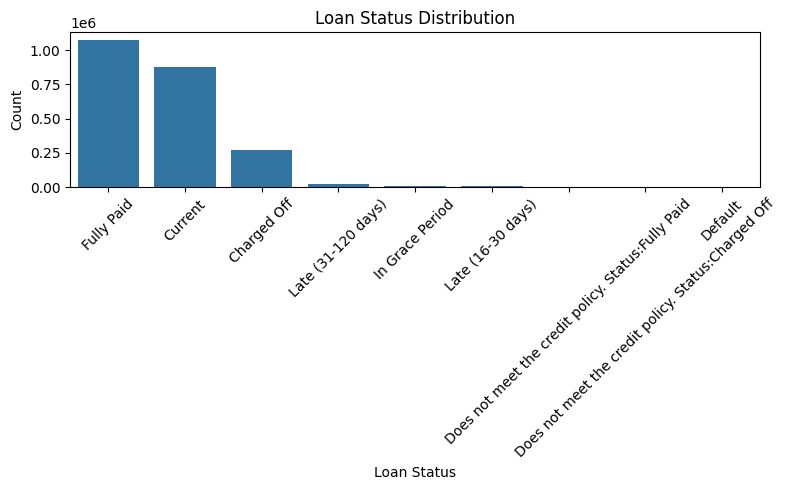

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='loan_status', order=dataset['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Note:** We can observe a `class imbalance` between the various classes.

### Correlation Matrix

We compute and visualize the correlation matrix for numerical features to identify relationships and potential predictors for the model.


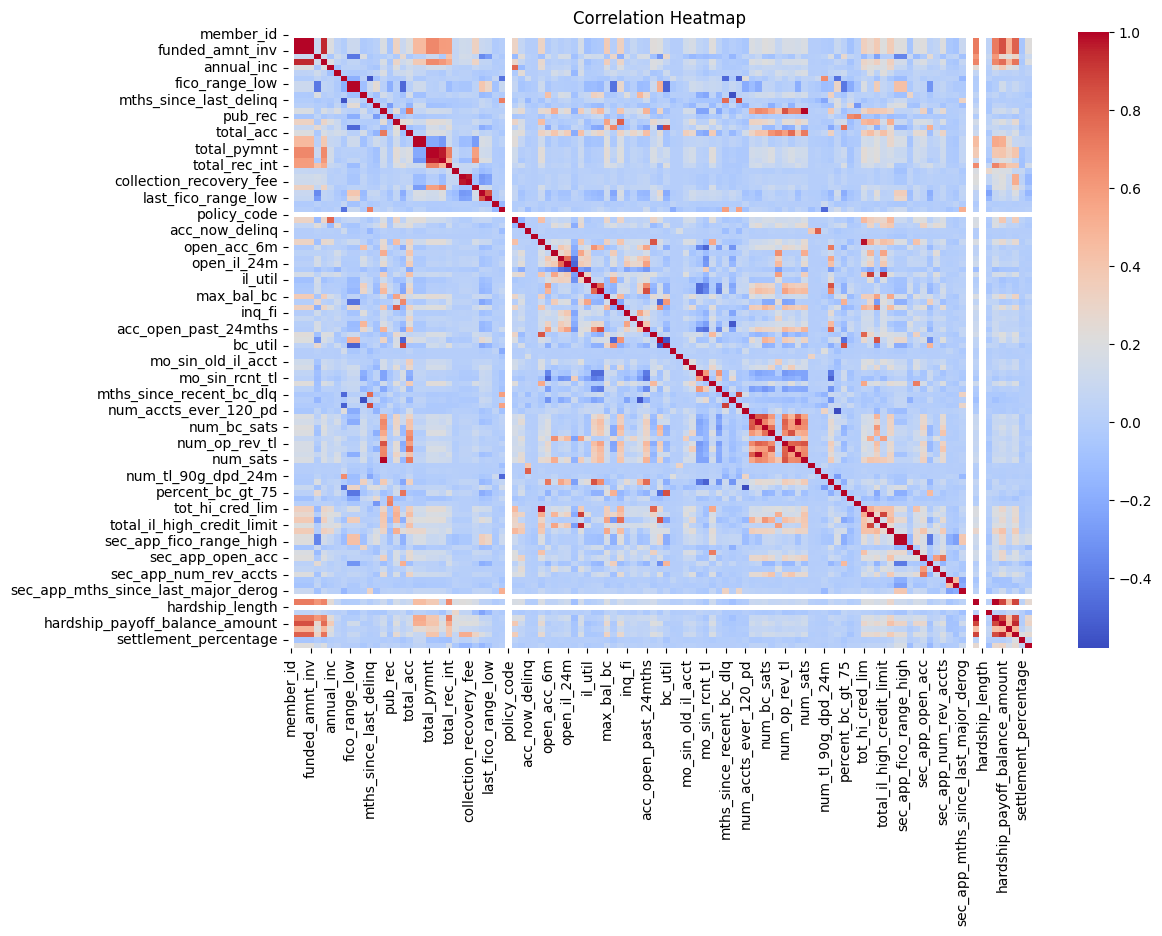

In [ ]:
correlation_matrix = dataset.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

### Data Cleaning

In this section, we clean the dataset based on insights from the exploratory analysis. This includes removing irrelevant or low-value columns, handling missing values, and preparing the data for modeling. <br>

Have a **"Rule of Thumb"** for missing data. If the missing or null values in a column is beyond ``80%`` of the total rows then it is likely to be dropped unless that column has <u>**critical meaning**</u>, you have domain knowledge or external data to fill those missing values.


In [ ]:
threshold = dataset.isnull().mean() * 100
high_missing_val = threshold[threshold > 80].sort_values(ascending=False).index

print(high_missing_val)

Index(['member_id', 'orig_projected_additional_accrued_interest',
       'hardship_end_date', 'hardship_reason', 'hardship_status',
       'hardship_type', 'hardship_start_date', 'hardship_loan_status',
       'hardship_dpd', 'hardship_length', 'payment_plan_start_date',
       'hardship_amount', 'hardship_payoff_balance_amount',
       'hardship_last_payment_amount', 'deferral_term', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'settlement_status', 'debt_settlement_flag_date',
       'sec_app_mths_since_last_major_derog', 'sec_app_revol_util',
       'revol_bal_joint', 'sec_app_fico_range_low',
       'sec_app_collections_12_mths_ex_med', 'sec_app_fico_range_high',
       'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line',
       'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts',
       'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_open_act_il',
       'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'des

Visualize the results above.

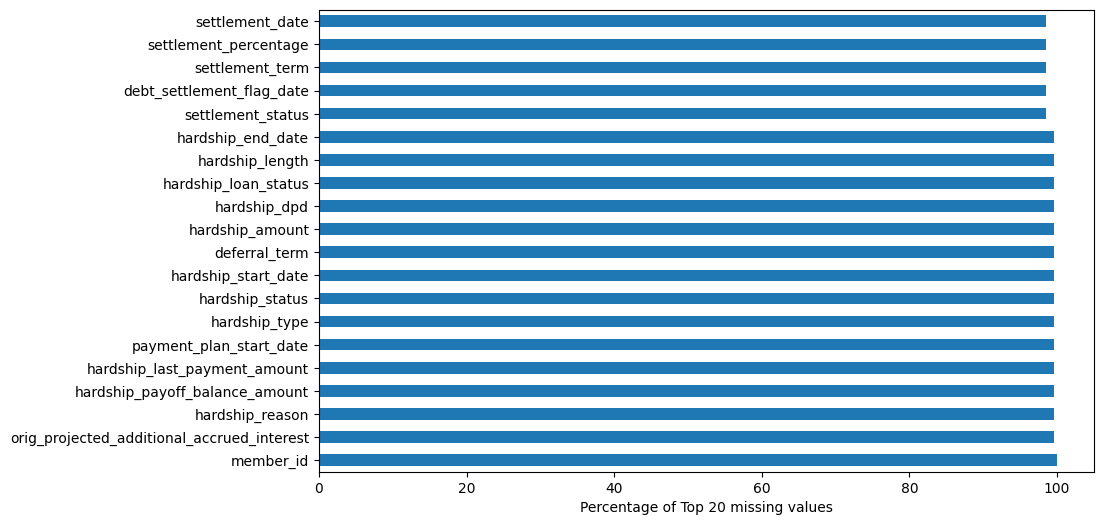

In [ ]:
threshold.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,6))
plt.xlabel('Percentage of Top 20 missing values')
plt.show()

#### Column Dropping — Post-Loan and Irrelevant Features

Based on EDA and business understanding, we drop columns that fall into the following categories:

* **Post-loan outcome features**: These contain information that would not be available at the time of loan approval and can lead to data leakage (e.g., `total_pymnt`, `recoveries`, `last_fico_range_low`)

* **High-missing-value fields**: Particularly those related to joint applications or hardship/settlement programs

* **Administrative or user-entered fields**: Such as IDs and free-text descriptions


In [ ]:
columns_to_drop = ['member_id', 'orig_projected_additional_accrued_interest',
       'hardship_end_date', 'hardship_reason', 'hardship_status',
       'hardship_type', 'hardship_start_date', 'hardship_loan_status',
       'hardship_dpd', 'hardship_length', 'payment_plan_start_date',
       'hardship_amount', 'hardship_payoff_balance_amount',
       'hardship_last_payment_amount', 'deferral_term', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'settlement_status', 'debt_settlement_flag_date',
       'sec_app_mths_since_last_major_derog', 'sec_app_revol_util',
       'revol_bal_joint', 'sec_app_fico_range_low',
       'sec_app_collections_12_mths_ex_med', 'sec_app_fico_range_high',
       'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line',
       'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts',
       'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_open_act_il',
       'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'desc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low'
       ]

dataset.drop(columns=columns_to_drop, inplace=True)

#### Removing Demographic Variables

To prevent bias and ensure fairness in loan approval prediction, we remove geographic and demographic variables such as `addr_state` and `zip_code`. These features, while potentially predictive, could introduce unethical or discriminatory bias into the model.


In [ ]:
columns_to_drop = [ 'zip_code', 'addr_state', 'emp_title']

dataset.drop(columns=columns_to_drop, inplace=True)

#### Removing Joint Application and Secondary Applicant Columns

In this step, we remove all columns related to **joint loan applications** and **secondary (co-) applicants**, including:

- `annual_inc_joint`, `dti_joint`, `verification_status_joint`
- All columns prefixed with `sec_app_` (e.g., `sec_app_fico_range_high`, `sec_app_open_acc`, etc.)

These fields are only populated for joint loans and are typically `NaN` for individual borrowers. Since our machine learning model focuses solely on **individual loan applications**, keeping these columns would:

- Introduce unnecessary sparsity and noise
- Complicate preprocessing due to large amounts of missing data
- Add features not relevant to the majority of loan records

By dropping these variables, we simplify the dataset and ensure our model is trained on consistent, reliable inputs relevant to single applicants only.


In [ ]:
columns_to_drop = [
    'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    'revol_bal_joint',
    'sec_app_fico_range_low', 'sec_app_fico_range_high',
    'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
    'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
    'sec_app_open_act_il', 'sec_app_num_rev_accts',
    'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med',
    'sec_app_mths_since_last_major_derog'
]

dataset.drop(columns=columns_to_drop, inplace=True, errors='ignore')

#### Review of Categorical Variables (Object-Type Columns)
In this section, we examine object-type (categorical) columns in the dataset to determine which are useful for training a machine learning model to predict loan default. Our goal is to retain only relevant features that are:

- Known before the loan is granted (to avoid data leakage),
- Potentially predictive or informative,
- Reasonably clean or transformable.

In [ ]:
dataset.dtypes.value_counts()

,count
float64,76
object,21


In [ ]:
non_float_cols = dataset.dtypes[dataset.dtypes != 'float64'].index
print(non_float_cols)
print(len(non_float_cols))

Index(['id', 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')
21



| Column Name           | Description                                                                  |
| --------------------- | ---------------------------------------------------------------------------- |
| `term`                | Duration of the loan (e.g., 36 or 60 months)                                 |
| `grade`               | Credit grade assigned by Lending Club                                        |
| `sub_grade`           | Finer granularity of credit grade                                            |
| `home_ownership`      | Housing status of the borrower (e.g., RENT, OWN)                             |
| `verification_status` | Status of income verification                                                |
| `purpose`             | Purpose for which the loan was requested                                     |
| `application_type`    | Whether the loan is individual or joint                                      |
| `loan_status`         | **Target variable** – final loan outcome (will be converted later to binary) |

<br>
Based on the list of Categorical Variables here are some variables to keep (Directly usable for modeling). While the remaining categorical/object columns are to be dropped.


In [ ]:
drop_columns = [
    'id', 'pymnt_plan', 'url', 'title', 'issue_d',
    'last_pymnt_d', 'next_pymnt_d', 'hardship_flag',
    'debt_settlement_flag'
    ]

dataset.drop(columns=drop_columns, inplace=True)

In [ ]:
len(list(dataset.columns))

88

Current dataset has now <u>**88**</u> columns from the initial 151 columns.

#### Handling Missing Values in Credit History Timing Columns

Some features in the dataset represent the number of months since a borrower last experienced a negative credit event, such as a delinquency or derogatory remark. These include:

- `mths_since_last_record`
- `mths_since_recent_bc_dlq`
- `mths_since_last_major_derog`
- `mths_since_recent_revol_delinq`
- `mths_since_last_delinq`

In many cases, missing values in these columns do **not** indicate bad data but rather the **absence of the event** — for example, the borrower never had a delinquency or public record.

To preserve this distinction, we fill the missing values with **-1**, which semantically means "**no such event has occurred**". This avoids misrepresenting the absence of an event as having occurred recently (which would be implied by filling with `0`).

This approach is particularly effective for tree-based models like Random Forest or XGBoost, which can naturally separate `-1` as its own category during training.


In [ ]:
total_rows = dataset.shape[0]
missing_values = dataset.isnull().sum()
missing_percentage = (missing_values / total_rows) * 100

missing_df = pd.DataFrame({
    'Column Name': missing_values.index,
    'Number of Missing Values': missing_values.values,
    'Percentage of Missing Values': missing_percentage.values
})

missing_df = missing_df[missing_df['Percentage of Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Number of Missing Values', ascending=False)
missing_df

,Column Name,Number of Missing Values,Percentage of Missing Values
21,mths_since_last_record,1901545,84.113069
62,mths_since_recent_bc_dlq,1741000,77.011511
29,mths_since_last_major_derog,1679926,74.309960
64,mths_since_recent_revol_delinq,1520342,67.250910
20,mths_since_last_delinq,1158535,51.246715
...,...,...,...
27,initial_list_status,33,0.001460
31,application_type,33,0.001460
30,policy_code,33,0.001460
24,revol_bal,33,0.001460


Checking columns with months.

In [ ]:
mths_columns = [col for col in dataset.columns if 'mths' in col.lower()]
print(f"Columns with 'mths' in name: ({len(mths_columns)} found)")
print(mths_columns)

Columns with 'mths' in name: (12 found)
['inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'acc_open_past_24mths', 'chargeoff_within_12_mths', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq']


Checking which of these columns have missing values.

In [ ]:
mths_with_na = [col for col in mths_columns if dataset[col].isna().sum() > 0]
print(f"'mths' columns with missing values: ({len(mths_with_na)} found)")
print(mths_with_na)

'mths' columns with missing values: (12 found)
['inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'acc_open_past_24mths', 'chargeoff_within_12_mths', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq']


Fill the columns with -1 as it indicates `No Record`. Columns with date or temporal data for values in particular isn't always right be filled with median or mode as it might distort behavioral pattern.

In [ ]:
cols_to_fill = [
    'mths_since_last_record',
    'mths_since_recent_bc_dlq',
    'mths_since_last_major_derog',
    'mths_since_recent_revol_delinq',
    'mths_since_last_delinq',
    'mths_since_rcnt_il',
    'mths_since_recent_bc',
    'mths_since_recent_inq'
]

dataset[cols_to_fill] = dataset[cols_to_fill].fillna(-1)

In [ ]:
fill_with_zero = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths']

dataset[fill_with_zero] = dataset[fill_with_zero].fillna(0)

**Note on `acc_open_past_24mths` and `inq_last_6mths`:**

- `acc_open_past_24mths`: This column is not filled unless null. This column shows the number of accounts opened in past 2 years. Shouldn’t have many missing values. If null → maybe fill with median.

- `inq_last_6mths`: This column is **retained without any filling** because it records the **number of recent credit inquiries**, which is known at the time of loan application. It usually has no missing values. If any nulls are found later, they should be investigated rather than imputed blindly.

#### Identifying Remaining Columns with Missing Values

After several rounds of cleaning and targeted imputation, we now perform a final check for any remaining columns with missing values.

This step helps ensure:
- All important columns are properly handled before modeling
- No unexpected nulls remain that could disrupt encoding or training
- We make informed decisions on whether to **impute**, **drop**, or **transform** the remaining columns

The output below shows each column that still has missing values, along with the **count** and **percentage** of missing entries.


In [ ]:
missing_info = dataset.isnull().sum()
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Missing Values': missing_info,
    'Percent Missing': (missing_info / len(dataset)) * 100
})

missing_df

,Missing Values,Percent Missing
il_util,1068883,47.281042
all_util,866381,38.323555
total_cu_tl,866163,38.313912
open_acc_6m,866163,38.313912
inq_last_12m,866163,38.313912
...,...,...
fico_range_low,33,0.001460
application_type,33,0.001460
policy_code,33,0.001460
fico_range_high,33,0.001460


We start filling columns that are important such as `term`, `grade` , etc. with either **Unknown** or using **mode**. For columns with numerical values we could use the **median**. <br>
**Note**: Review your data first before implementing this steps as it might require different approach or solution.

In [ ]:
dataset['annual_inc'] = dataset['annual_inc'].fillna(dataset['annual_inc'].median())
dataset['dti'] = dataset['dti'].fillna(dataset['dti'].median())
dataset['fico_range_low'] = dataset['fico_range_low'].fillna(dataset['fico_range_low'].median())
dataset['fico_range_high'] = dataset['fico_range_high'].fillna(dataset['fico_range_high'].median())

dataset['emp_length'] = dataset['emp_length'].fillna('Unknown')
dataset['term'] = dataset['term'].fillna(dataset['term'].mode()[0])
dataset['grade'] = dataset['grade'].fillna(dataset['grade'].mode()[0])
dataset['sub_grade'] = dataset['sub_grade'].fillna(dataset['sub_grade'].mode()[0])
dataset['purpose'] = dataset['purpose'].fillna('Unknown')
dataset['home_ownership'] = dataset['home_ownership'].fillna('Unknown')

dataset['revol_util'] = dataset['revol_util'].fillna(-1)

dataset = dataset[~dataset['loan_amnt'].isnull()]
dataset = dataset[~dataset['installment'].isnull()]

Check remaining columns.

In [ ]:
remaining_nulls = dataset.isnull().sum()
remaining_nulls = remaining_nulls[remaining_nulls > 0]
print("Remaining columns with nulls:", remaining_nulls)

Remaining columns with nulls: delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     30
open_acc                           29
pub_rec                            29
total_acc                          29
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    866130
open_act_il                    866129
open_il_12m                    866129
open_il_24m                    866129
total_bal_il                   866129
il_util                       1068850
open_rv_12m                    866129
open_rv_24m                    866129
max_bal_bc                     866129
all_util                       866348
total_rev_hi_lim                70276
inq_fi                         866129
total_cu_tl                    866130
inq_last_12m                   866130
acc_open_past_24mths            50030
avg_cur_bal                     70346
bc_open_to_buy      

Drop rows with low missing/null values. And fill the rest with -1 for "Unknown"

In [ ]:
low_null_cols = [
    'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'total_acc', 'acc_now_delinq', 'total_rev_hi_lim', 'delinq_amnt',
    'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
    'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_tl',
    'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
    'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
    'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
    'total_il_high_credit_limit', 'num_tl_120dpd_2m'
]
dataset = dataset.dropna(subset=low_null_cols)

fill_with_neg1 = [
    'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
    'mort_acc', 'total_bc_limit', 'total_bal_ex_mort', 'mo_sin_old_il_acct', 'percent_bc_gt_75'
]
dataset[fill_with_neg1] = dataset[fill_with_neg1].fillna(-1)

high_missing_cols = [
    'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il',
    'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
    'inq_fi', 'total_cu_tl', 'inq_last_12m'
]
dataset[high_missing_cols] = dataset[high_missing_cols].fillna(-1)

### Encoding Categorical Variables

Now that we’ve completed the data cleaning process, the next essential step in preparing our dataset for machine learning is to **encode categorical variables**.

Most machine learning models require input data to be in **numerical format**. However, our dataset contains several columns with **categorical (non-numeric) values**, such as:

- `emp_length` — Employment length  
- `purpose` — Purpose of the loan  
- `grade` and `sub_grade` — Credit grade tiers  
- `home_ownership` — Home ownership status  
- `term` — Loan term duration  
- And others

To ensure that the model can interpret these variables correctly, we will convert them into numeric format using appropriate encoding techniques:

- ✅ **Ordinal Encoding** for features with an inherent order (e.g., `grade`, `sub_grade`, `emp_length`)  
- ✅ **One-Hot Encoding** for features with no natural order (e.g., `purpose`, `home_ownership`, `application_type`)

> ⚠️ **Note:** Encoding must be done *before* feature selection or training, as most machine learning algorithms and statistical methods can only process numerical input.

In the next code cell, we will identify which columns are categorical and determine the best encoding strategy for each.


In [ ]:
categorical_cols = dataset.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns detected:")
for col in categorical_cols:
    print(f"- {col}")

Categorical columns detected:
- term
- grade
- sub_grade
- emp_length
- home_ownership
- verification_status
- loan_status
- purpose
- earliest_cr_line
- initial_list_status
- application_type
- disbursement_method


In [ ]:
for col in categorical_cols:
    print(f"\n Column: {col}")
    print(dataset[col].unique())


 Column: term
[' 36 months' ' 60 months']

 Column: grade
['C' 'B' 'F' 'A' 'E' 'D' 'G']

 Column: sub_grade
['C4' 'C1' 'B4' 'C5' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'A1'
 'D4' 'F3' 'D1' 'B3' 'E4' 'D3' 'D2' 'D5' 'A5' 'E3' 'F2' 'F5' 'E5' 'A3'
 'G2' 'G1' 'E1' 'G3' 'G4' 'F4' 'G5']

 Column: emp_length
['10+ years' '3 years' '4 years' '6 years' '1 year' '7 years' '8 years'
 '5 years' '2 years' '9 years' '< 1 year' 'Unknown']

 Column: home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']

 Column: verification_status
['Not Verified' 'Source Verified' 'Verified']

 Column: loan_status
['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default']

 Column: purpose
['debt_consolidation' 'small_business' 'home_improvement' 'major_purchase'
 'credit_card' 'other' 'house' 'vacation' 'car' 'medical' 'moving'
 'renewable_energy' 'wedding' 'educational']

 Column: earliest_cr_line
['Aug-2003' 'Dec-1999' 'Aug-2000' 'Sep-2008' 'Jun-1998'

Processing `earliest_cr_line` into Credit History Length

Based on initial observation, we start our encoding process by transforming the column `earliest_cr_line`, which contains date strings like `'Jan-2005'`, `'Dec-1999'`, etc. This column represents the borrower's **earliest recorded credit line**, and is a valuable indicator of their **credit history length** — an important factor in assessing financial risk.

However, since the values are in string format, they must first be **converted into proper datetime objects**. Once converted, we compute a new feature: `credit_history_length`, which represents the **number of years** between the earliest credit line and a fixed reference point in time.

> ⚠️ Note: Instead of using the current year (e.g., 2025), we use **2018** as the reference year — the endpoint of this dataset’s time coverage — to avoid introducing data leakage from the future.

This new column gives us a clean, numerical representation of a borrower’s credit age, which can now be used safely in model training. After creating this new column, we drop the original `earliest_cr_line` column since it's no longer needed in its raw form.


In [ ]:
dataset['earliest_cr_line'] = pd.to_datetime(dataset['earliest_cr_line'], format='%b-%Y', errors='coerce')

reference_year = 2018
dataset['credit_history_length'] = reference_year - dataset['earliest_cr_line'].dt.year

dataset.drop('earliest_cr_line', axis=1, inplace=True)

#### Performing Encoding Categorical Variables (Ordinal and Nominal)

After identifying all categorical features in the dataset, we now prepare them for machine learning by converting them into numerical format. Most ML models cannot directly interpret string-based categories, so encoding is essential.

We divide the categorical variables into two types:

---

#### 🔷 Ordinal Variables (with inherent order)

These features have a clear, ranked structure, so we will apply **Label Encoding or Ordinal Encoding**:

- `term`: Loan duration, where `'36 months' < '60 months'`
- `grade`: Credit score grade from `'A'` (best) to `'G'` (worst)
- `sub_grade`: Fine-grained version of grade (e.g., `A1 < A2 < ... < G5`)
- `emp_length`: Length of employment (e.g., `'< 1 year' < '1 year' < ... < '10+ years'`)

---

#### 🟨 Nominal Variables (no natural order)

These features have no rank or hierarchy, so we apply **One-Hot Encoding**:

- `home_ownership`: Types of housing (Rent, Mortgage, etc.)
- `verification_status`: Loan info verification status
- `purpose`: Reason for the loan
- `initial_list_status`: Internal LC listing code
- `application_type`: Individual or Joint App
- `disbursement_method`: Method of disbursing funds

---

> 🔄 `loan_status`: This is our **target variable** and will not be encoded here. We will process it separately when we begin model training.

In the next steps, we will first encode the ordinal variables using custom mapping, and then apply one-hot encoding to the nominal ones.


In [ ]:
dataset['term'] = dataset['term'].str.strip()

term_mapping = {
    '36 months': 0,
    '60 months': 1
}
dataset['term'] = dataset['term'].map(term_mapping)

grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
grade_mapping = {grade: i for i, grade in enumerate(grade_order)}
dataset['grade'] = dataset['grade'].map(grade_mapping)

subgrades = sorted(dataset['sub_grade'].dropna().unique(), key=lambda x: (x[0], int(x[1:])))
subgrade_mapping = {subgrade: idx for idx, subgrade in enumerate(subgrades)}
dataset['sub_grade'] = dataset['sub_grade'].map(subgrade_mapping)

dataset['emp_length'] = dataset['emp_length'].str.strip()

emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    'Unknown': -1
}
dataset['emp_length'] = dataset['emp_length'].map(emp_length_mapping)

In [ ]:
nominal_cols = [
    'home_ownership',
    'verification_status',
    'purpose',
    'initial_list_status',
    'application_type',
    'disbursement_method'
]

dataset = pd.get_dummies(dataset, columns=nominal_cols, prefix=nominal_cols, drop_first=True)

#### Encoding the Target Variable: `loan_status`

As the final part of our categorical encoding process, we now prepare the **target variable** — `loan_status` — which indicates whether a loan was repaid successfully or resulted in a default.

The original values in `loan_status` include multiple statuses such as:

- `Fully Paid`
- `Current`
- `Charged Off`
- `Default`
- `Late (31-120 days)`
- `Late (16-30 days)`
- `In Grace Period`, etc.

---

#### ✅ Problem Framing: Binary Classification

For this project, we simplify the problem as a **binary classification task**:

- `1` = The borrower **defaulted** (e.g., `Charged Off`, `Default`, or Lates)
- `0` = The loan was **fully paid**
- Other ambiguous statuses like `Current` and `In Grace Period` are **excluded** to avoid uncertainty and ensure data clarity

This approach allows us to build a focused model that answers the question:
> *"Will this borrower default on their loan?"*

We will now filter the dataset to keep only the relevant statuses and encode the target accordingly.


In [ ]:
default_statuses = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)']

dataset = dataset[dataset['loan_status'].isin(['Fully Paid'] + default_statuses)]

dataset['loan_status'] = dataset['loan_status'].apply(lambda x: 1 if x in default_statuses else 0)

### Feature Selection: Identifying Important Predictors

With data cleaning and encoding complete, we now move into **feature selection**, the process of identifying which features (columns) are most relevant for predicting the target variable, `loan_status`.

Not all features contribute equally to a machine learning model. Some may be redundant, weakly related, or introduce noise. By removing these less useful features, we can:

- Improve model accuracy and efficiency
- Reduce overfitting and training time
- Make the model easier to interpret

---

#### What We’ll Do:

In this section, we’ll begin feature selection by examining how **numerical features** correlate with the target variable. This gives us a quick idea of which features are **most linearly related** to loan default outcomes.

>  Note: Not all important features are strongly correlated. Correlation is just one tool — later we can use **model-based methods** (e.g., Random Forest feature importance) for deeper analysis.

Next, we'll generate a correlation matrix and visually explore which features have meaningful relationships with `loan_status`.


#### Creating a Correlation Matrix

Correlation Matrix, a technique used to measure the linear relationship between each numeric feature and the target variable `loan_status`. This helps us identify features that are **strongly** (positively or negatively) **related** to the target and **remove features** with very weak linear relationships, which are unlikely to help in prediction. We considered a feature as weak if its absolute correlation with `loan_status` was less than <u>**0.05**</u> (|r| < 0.05).



In [ ]:
correlation_matrix = dataset.corr(numeric_only=True)
correlation_with_target = correlation_matrix['loan_status'].sort_values(key=abs, ascending=False)
top_features = correlation_with_target.head(20)
print("Top 20 features most correlated with loan_status:\n")
print(top_features)

Top 20 features most correlated with loan_status:

loan_status             1.000000
sub_grade               0.272642
grade                   0.266139
int_rate                0.265919
term                    0.184330
fico_range_low         -0.125041
fico_range_high        -0.125039
acc_open_past_24mths    0.097373
all_util                0.093317
open_rv_24m             0.090813
open_rv_12m             0.083230
num_tl_op_past_12m      0.082527
open_acc_6m             0.081793
dti                     0.081450
inq_last_12m            0.081036
mort_acc               -0.079793
tot_hi_cred_lim        -0.078276
avg_cur_bal            -0.078190
bc_open_to_buy         -0.077516
inq_fi                  0.075871
Name: loan_status, dtype: float64


Visualize the results.

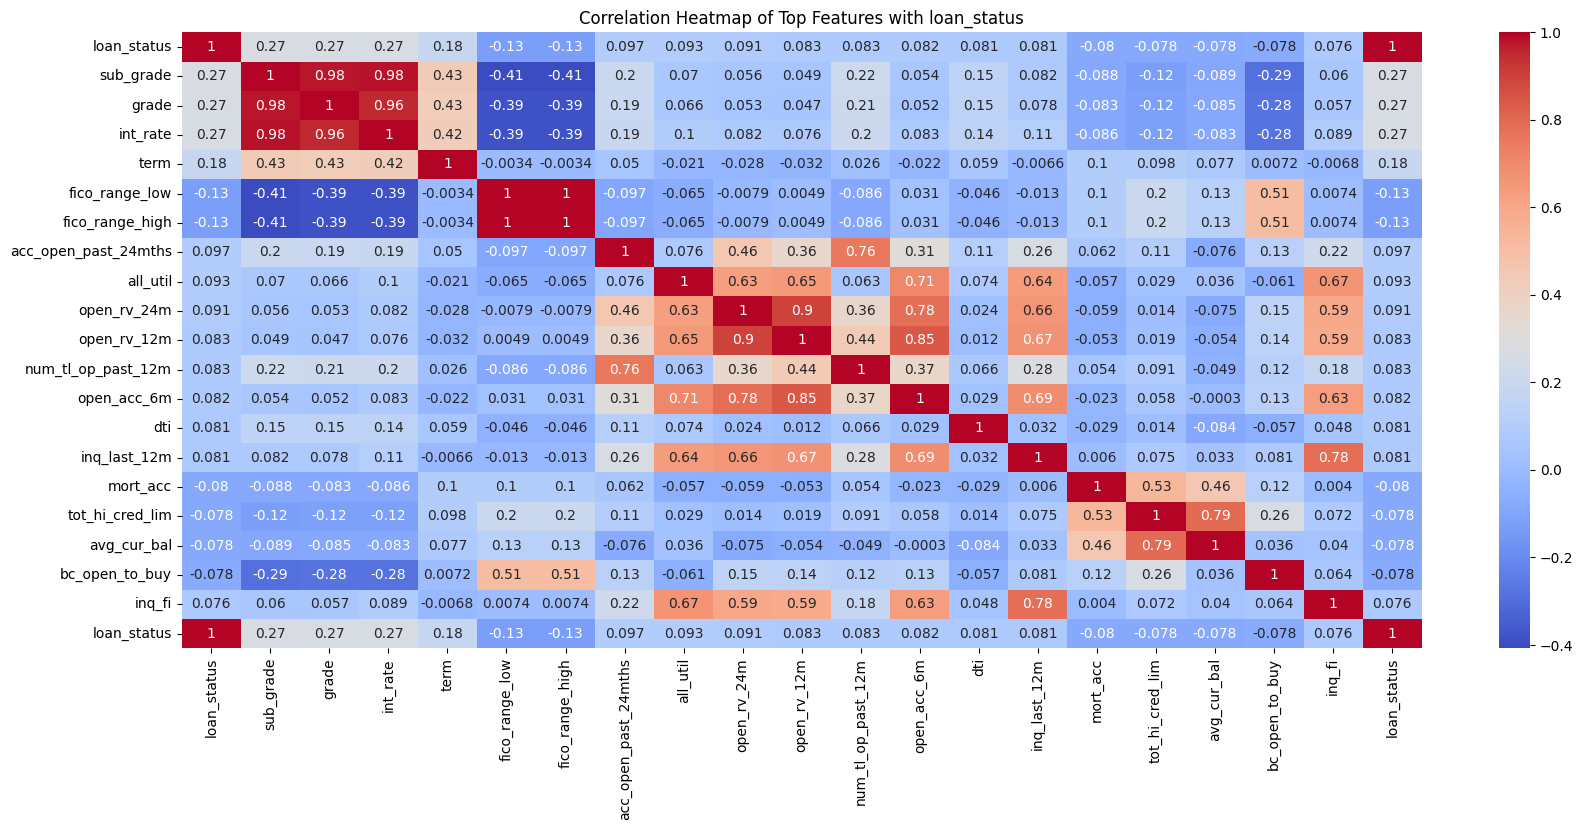

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(dataset[top_features.index.tolist() + ['loan_status']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Top Features with loan_status")
plt.show()

#### Model-Based (Random Forest Importance)
After the correlation check, we used a Random Forest Classifier to calculate the model-based feature importances. This step captures **non-linear** and **interaction effects** that correlation cannot detect. Feature importance in Random Forests shows how much a model relies on a feature to make predictions. Features with importance less than 0.005 were considered weak contributors.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

X = dataset.drop('loan_status', axis=1)
y = dataset['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

print("Top 20 Features by Random Forest Importance:\n")
print(importances_sorted.head(20))

Top 20 Features by Random Forest Importance:

int_rate                      0.032509
dti                           0.027170
sub_grade                     0.027031
mo_sin_old_rev_tl_op          0.023329
tot_hi_cred_lim               0.022995
avg_cur_bal                   0.022972
annual_inc                    0.022222
grade                         0.022191
installment                   0.022061
mo_sin_old_il_acct            0.021936
bc_open_to_buy                0.021730
tot_cur_bal                   0.021479
revol_util                    0.021438
revol_bal                     0.021310
total_rev_hi_lim              0.021288
bc_util                       0.021225
total_bc_limit                0.021138
total_bal_ex_mort             0.020378
total_il_high_credit_limit    0.018709
mths_since_recent_bc          0.018156
dtype: float64


#### Dropping Low-Value Features (Both Filters)

After evaluating features using both methods, we removed columns that were flagged by both the correlation analysis and the Random Forest model. We retained features that passed at least one of the two importance checks, ensuring we do not mistakenly discard non-linear patterns missed by the correlation matrix.



In [ ]:
correlation_matrix = dataset.corr(numeric_only=True)
correlations = correlation_matrix['loan_status'].drop('loan_status')
abs_correlations = correlations.abs()

feature_summary = pd.DataFrame({
    'Correlation': correlations,
    'AbsCorrelation': abs_correlations,
    'RF_Importance': importances
})

to_drop = feature_summary[
    (feature_summary['AbsCorrelation'] < 0.05) &
    (feature_summary['RF_Importance'] < 0.005)
].sort_values(by='AbsCorrelation')

print("Features weak in both correlation and model importance:\n")
print(to_drop)

Features weak in both correlation and model importance:

                                     Correlation  AbsCorrelation  \
purpose_major_purchase                 -0.000233        0.000233   
purpose_educational                    -0.000467        0.000467   
home_ownership_OTHER                   -0.000540        0.000540   
num_tl_120dpd_2m                        0.000595        0.000595   
home_ownership_NONE                    -0.000864        0.000864   
purpose_vacation                       -0.001332        0.001332   
num_tl_30dpd                            0.002036        0.002036   
purpose_renewable_energy                0.002161        0.002161   
delinq_amnt                             0.002238        0.002238   
chargeoff_within_12_mths                0.002541        0.002541   
acc_now_delinq                          0.002618        0.002618   
purpose_wedding                        -0.004448        0.004448   
purpose_house                           0.005732        0.0

In [ ]:
drop_features = to_drop.index.tolist()
dataset.drop(columns=drop_features, inplace=True)

print(f"Dropped {len(drop_features)} low-value features.")

Dropped 33 low-value features.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251976 entries, 0 to 2260697
Data columns (total 72 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   loan_amnt                       1251976 non-null  float64
 1   funded_amnt                     1251976 non-null  float64
 2   funded_amnt_inv                 1251976 non-null  float64
 3   term                            1251976 non-null  int64  
 4   int_rate                        1251976 non-null  float64
 5   installment                     1251976 non-null  float64
 6   grade                           1251976 non-null  int64  
 7   sub_grade                       1251976 non-null  int64  
 8   emp_length                      1251976 non-null  int64  
 9   annual_inc                      1251976 non-null  float64
 10  loan_status                     1251976 non-null  int64  
 11  dti                             1251976 non-null  float64
 12  fico_

### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop('loan_status', axis=1)
y = dataset['loan_status']

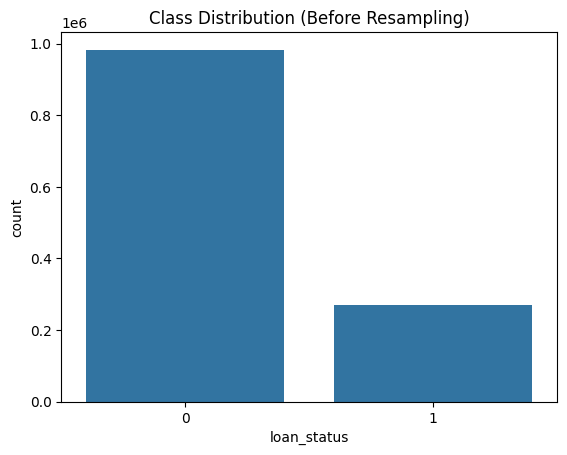

In [ ]:
sns.countplot(x='loan_status', data=dataset)
plt.title('Class Distribution (Before Resampling)')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We implement SMOTE as the classes are not balanced.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("Before SMOTE:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())
print(pd.Series(y_train_resampled).value_counts(normalize=True))

Before SMOTE:
loan_status
0    687910
1    188473
Name: count, dtype: int64
loan_status
0    0.784942
1    0.215058
Name: proportion, dtype: float64

After SMOTE:
loan_status
0    687910
1    687910
Name: count, dtype: int64
loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64


### Model Training

#### Initial Training using Random Forest
On this section of this notebook we finally perform model training using the data that we preprocessed. We simply call `RandomForestClassifier` and set its parameters such as the `random_state`. We display the results then after the model training.

Confusion Matrix:
[[280094  15134]
 [ 66745  13620]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87    295228
           1       0.47      0.17      0.25     80365

    accuracy                           0.78    375593
   macro avg       0.64      0.56      0.56    375593
weighted avg       0.74      0.78      0.74    375593

Accuracy: 0.7820007295130633
ROC-AUC: 0.7071223513520097


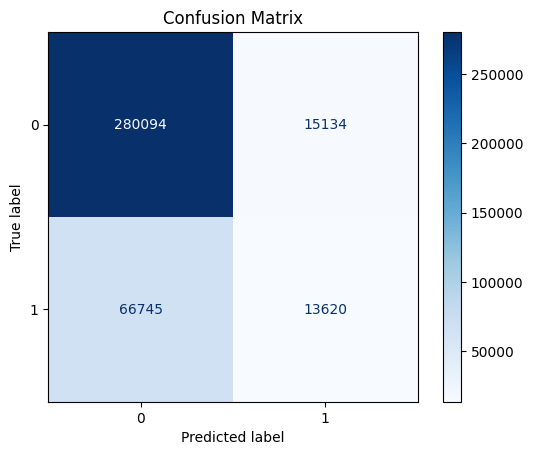

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Check which feature Random Forest relied the most.

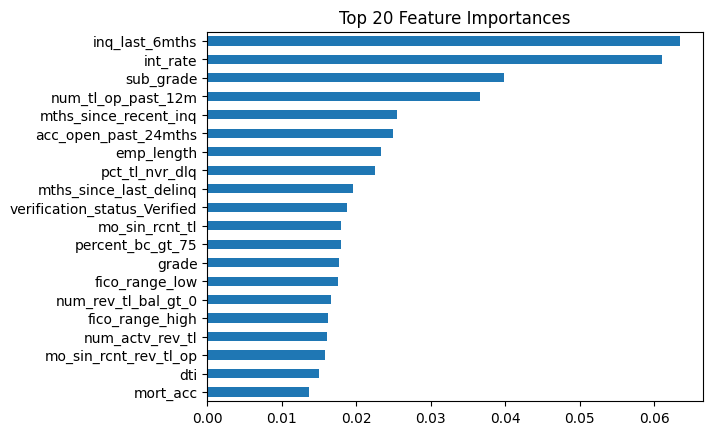

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(20)

top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances")
plt.show()

#### Use and Compare other models in terms of performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"{name} ROC-AUC: {auc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression ROC-AUC: 0.6578
Gradient Boosting ROC-AUC: 0.6983
[LightGBM] [Info] Number of positive: 687910, number of negative: 687910
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.499918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15930
[LightGBM] [Info] Number of data points in the train set: 1375820, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM ROC-AUC: 0.7245


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost ROC-AUC: 0.7281


Use XGBoost with an improved ROC-AUC compared to Random Forest.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:45:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[285500   9728]
 [ 68438  11927]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88    295228
           1       0.55      0.15      0.23     80365

    accuracy                           0.79    375593
   macro avg       0.68      0.56      0.56    375593
weighted avg       0.75      0.79      0.74    375593

ROC-AUC: 0.7281066743037125


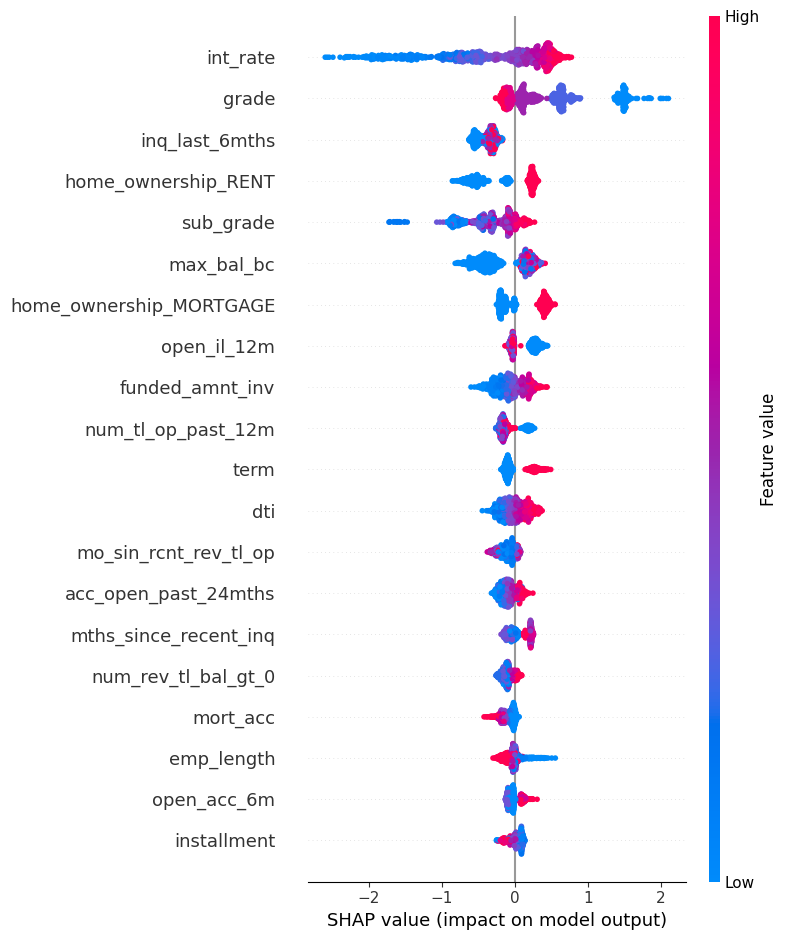

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test[:1000])

shap.summary_plot(shap_values, X_test[:1000])

## 📊 Model Findings – XGBoost + SHAP Analysis

After experimenting with multiple algorithms (Logistic Regression, Gradient Boosting, LightGBM, Random Forest, and XGBoost), **XGBoost** delivered one of the highest ROC-AUC scores, achieving:

- **ROC-AUC:** `0.7281`
- **Accuracy:** `0.79`
- **Precision (class 1 - Default):** `0.55`
- **Recall (class 1 - Default):** `0.15`
- **F1-score (class 1 - Default):** `0.23`

---

### 🔍 Interpretation of Metrics
While accuracy is relatively high (0.79), this is partially due to class imbalance — the model performs much better on the majority class (No Default) than the minority class (Default).  
- **High Precision for defaults (0.55)** → When the model predicts a default, it's correct more than half the time.  
- **Low Recall for defaults (0.15)** → The model misses many actual defaults, which could be improved with threshold tuning or imbalance handling strategies.

---

### 📈 SHAP Analysis – Feature Impact
We used **SHAP (SHapley Additive exPlanations)** to interpret how features influence the XGBoost model's predictions.

**Key insights from SHAP summary plot:**
- **`int_rate`** (interest rate) has the largest positive impact — higher rates increase the likelihood of default.
- **`grade`** and **`inq_last_6mths`** (recent credit inquiries) are also strong predictors.
- Certain categorical encodings like `home_ownership_RENT` and `home_ownership_MORTGAGE` significantly influence predictions.
- Features with blue color on the right (positive SHAP values) indicate that *low feature values* are linked to a higher probability of default, and vice versa for red.

---

### 💡 Business Implications
- The model can help **pre-screen loan applications** to flag high-risk borrowers for manual review.
- The SHAP analysis enables **explainable AI**, providing transparency on why an application was flagged.
- However, the low recall for defaults suggests that **threshold adjustment** or **alternative imbalance handling** may be necessary for deployment in a real-world financial risk environment.

---

### ✅ Conclusion
The project demonstrates:
1. **End-to-end ML pipeline** – from preprocessing and handling class imbalance to model evaluation.
2. **Model comparison & selection** – identifying XGBoost as a strong performer.
3. **Interpretability with SHAP** – allowing insights into key drivers of loan default risk.

